{'K': 1000000.0, 'fx_competent': 1.0848883733822177, 'dilution_heat': -11919.73183458108, 'dHcompetitor': -5838.4527052241974, 'dil2': -5512.0545173914197, 'dH': -3807.1929629292645, 'Kcompetitor': 28212.802927133176, 'fx2': 1.6084713399947501}


/home/harmsm/Desktop/pytc/pytc/models.py:97: RuntimeWarning: invalid value encountered in sqrt
  ST = (b - np.sqrt((b)**2 - 4*S_conc_corr*self._T_conc))/2


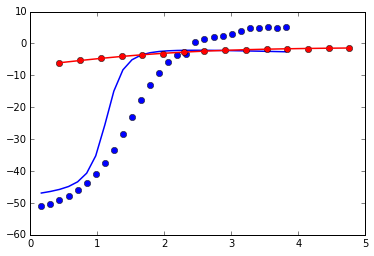

In [10]:
# Imports
import pytc
%matplotlib inline

# Set up the global fit with parameter guesses
fitter = pytc.GlobalFit({"K":1e6,"dH":-2000,"fx_competent":1.0,"dilution_heat":0.0,
                         "Kcompetitor":1e6,"dHcompetitor":-2000,"fx2":1.0,"dil2":0.0})

# Load in an experiment
e1 = pytc.ITCExperiment("test-data/hA5A5conTESCaTCEP.DH",pytc.models.SingleSite)

# Associate the global K1 parameter with the local KA parameter, etc.
fitter.add_experiment(e1,K=1e10)

# Load in another experiment
e2 = pytc.ITCExperiment("test-data/hA5NCX1TESCaTCEP.DH",pytc.models.SingleSite)
fitter.add_experiment(e2,{"Kcompetitor":"K",
                          "dHcompetitor":"dH",
                          "fx2":"fx_competent",
                          "dil2":"dilution_heat"})

# Do the global fit
fitter.fit()

# Plot the fit
fitter.plot()

# Print out the final fit parameters
print(fitter.fit_param)